importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data set

In [6]:
insurance_dataset=pd.read_csv('/content/insurance.csv')

get

In [7]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
insurance_dataset.shape

(1338, 7)

In [10]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
insurance_dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Checking for NUll values

In [12]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


distribution plots for each future

<Figure size 432x432 with 0 Axes>

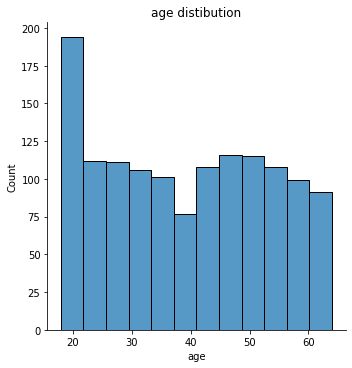

In [14]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["age"])
plt.title("age distibution")
plt.show()

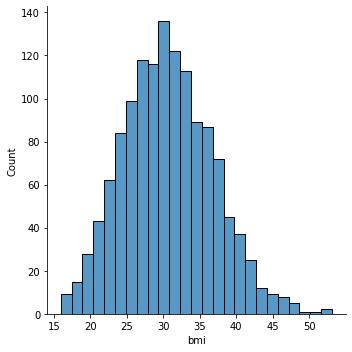

In [15]:
sns.displot(insurance_dataset['bmi'])
plt.show()

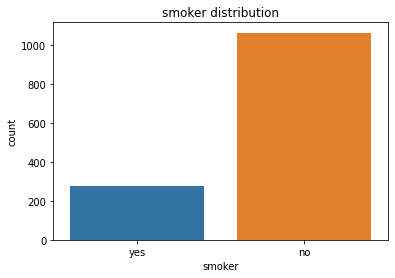

In [16]:
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker distribution')
plt.show()

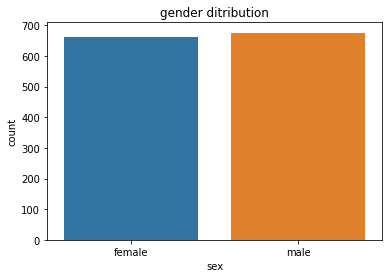

In [17]:
sns.countplot(x='sex',data=insurance_dataset)
plt.title('gender ditribution')
plt.show()

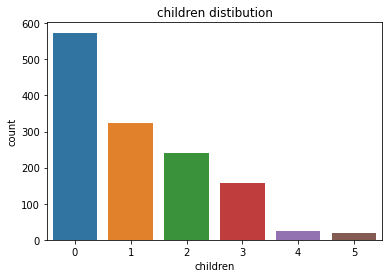

In [18]:

sns.countplot(x="children",data=insurance_dataset)
plt.title("children distibution")
plt.show()

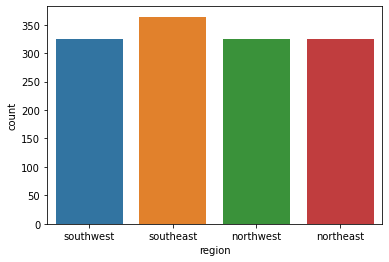

In [19]:
sns.countplot(x='region',data=insurance_dataset)
plt.show()

Main Dataset

In [20]:
print(insurance_dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


converting categorical values into numerical values

In [21]:
insurance_dataset.replace({'sex':{'male':1,'female':0}},inplace=True)


In [22]:
print(insurance_dataset)

      age  sex     bmi  children smoker     region      charges
0      19    0  27.900         0    yes  southwest  16884.92400
1      18    1  33.770         1     no  southeast   1725.55230
2      28    1  33.000         3     no  southeast   4449.46200
3      33    1  22.705         0     no  northwest  21984.47061
4      32    1  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    1  30.970         3     no  northwest  10600.54830
1334   18    0  31.920         0     no  northeast   2205.98080
1335   18    0  36.850         0     no  southeast   1629.83350
1336   21    0  25.800         0     no  southwest   2007.94500
1337   61    0  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [23]:
insurance_dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)


In [24]:
print(insurance_dataset)

      age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


In [25]:
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

Dataset after converting all categorical values into numerical values

In [26]:
print(insurance_dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       1  16884.92400
1      18    1  33.770         1       0       0   1725.55230
2      28    1  33.000         3       0       0   4449.46200
3      33    1  22.705         0       0       3  21984.47061
4      32    1  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       3  10600.54830
1334   18    0  31.920         0       0       2   2205.98080
1335   18    0  36.850         0       0       0   1629.83350
1336   21    0  25.800         0       0       1   2007.94500
1337   61    0  29.070         0       1       3  29141.36030

[1338 rows x 7 columns]


dividing feature variables and target variable

In [27]:
x=insurance_dataset.drop(columns='charges',axis=1)

In [28]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]


In [29]:
y=insurance_dataset['charges']

In [30]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


splitting the dataset into training and testing data

In [31]:
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
print(x.shape,x_train.shape,y_train.shape)

(1338, 6) (1070, 6) (1070,)


In [33]:
print(x.shape,x_test.shape,y_test.shape)

(1338, 6) (268, 6) (268,)


Linear Regression

In [34]:
regresor=LinearRegression()

**Fitting the model by training data(Training the model)**

In [35]:
regresor.fit(x_train,y_train)

LinearRegression()

insurance cost predicting for the test data

In [36]:
test_data_prediction=regresor.predict(x_test)

In [37]:
x_test['insurance Cost']=test_data_prediction

print(x_test)

      age  sex     bmi  children  smoker  region  insurance Cost
578    52    1  30.200         1       0       1    11314.556495
610    47    0  29.370         1       0       0     9505.588918
569    48    1  40.565         2       1       3    38360.583838
1034   61    1  38.380         0       0       3    16449.596404
198    51    0  18.050         0       0       3     7117.893798
...   ...  ...     ...       ...     ...     ...             ...
1084   62    0  30.495         2       0       3    14941.091521
726    41    1  28.405         1       0       3     8459.675930
1132   57    1  40.280         0       0       2    15796.925171
725    30    0  39.050         3       1       0    32906.580252
963    46    1  24.795         3       0       2     9115.849945

[268 rows x 7 columns]


Fitting line against age

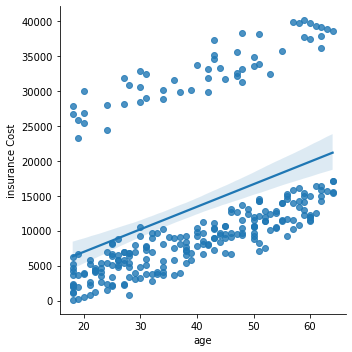

In [38]:
sns.lmplot(x='age', y='insurance Cost',data=x_test)

Fitting line against smoker


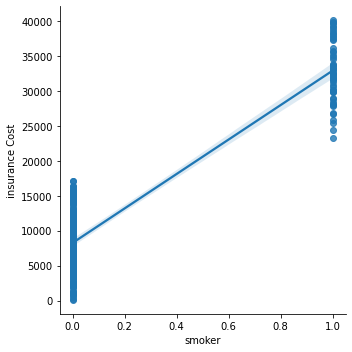

In [39]:
#yes=1, n=0
sns.lmplot(x='smoker',y='insurance Cost',data=x_test)

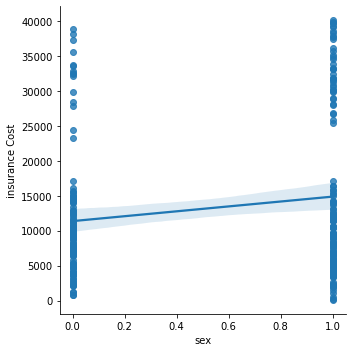

In [40]:
#male=1,female=0
sns.lmplot(x='sex', y='insurance Cost',data=x_test)

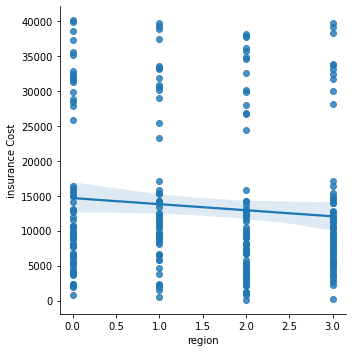

In [41]:
#southeast=0, southwest=1,norteast=2, northwest=3
sns.lmplot(x='region',y='insurance Cost',data=x_test)

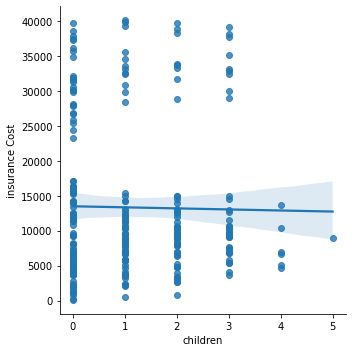

In [42]:
sns.lmplot(x='children', y='insurance Cost',data=x_test)

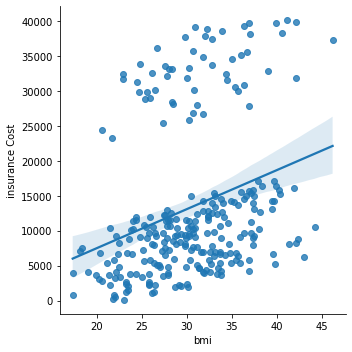

In [43]:
sns.lmplot(x='bmi',y='insurance Cost', data=x_test)

# ***(Model Evaluation)***

r2_score of testing data

In [50]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print(r2_test)

0.7989875396812892


mean squared value of testing data

In [51]:
mse_test=metrics.mean_squared_error(y_test,test_data_prediction)
print(mse_test)

31987105.23679422


Root mean squared error

In [52]:
rmse=np.sqrt(mse_test)
print(rmse)

5655.714387837686


In [53]:
input_data=(33,1,22.705,0,0,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regresor.predict(input_data_reshaped)
print(prediction)

[3544.8443634]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
input_data=(52,1,30.200,1,0,1 )
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regresor.predict(input_data_reshaped)
print(prediction)

[11314.55649519]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Actual and predicted Values

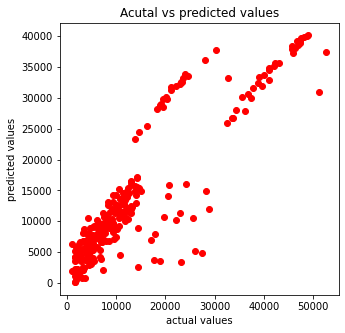

In [55]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,test_data_prediction,color='red')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Acutal vs predicted values')
plt.show()